In [9]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [10]:
avg_110, t_el, ql_dyn, ql_sta = process_group(group='E0110', 
                                              # prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis',
                                              prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                              zone_idx='auto',
                                              num_cores=24)

2023-11-23 22:20:25,737 utils                   : total number of files in E0110  is 1196
2023-11-23 22:21:32,772 utils                   : label='E0110_section_01': remove 13 datasets out of 120
2023-11-23 22:21:32,803 utils                   : label='E0110_section_00': remove 17 datasets out of 120
2023-11-23 22:21:32,810 utils                   : label='E0110_section_03': remove 15 datasets out of 120
2023-11-23 22:21:32,824 utils                   : label='E0110_section_02': remove 14 datasets out of 120
2023-11-23 22:21:32,930 utils                   : label='E0110_section_04': remove 14 datasets out of 120
2023-11-23 22:21:33,029 utils                   : label='E0110_section_06': remove 16 datasets out of 119
2023-11-23 22:21:33,068 utils                   : label='E0110_section_07': remove 12 datasets out of 119
2023-11-23 22:21:33,090 utils                   : label='E0110_section_09': remove 13 datasets out of 119
2023-11-23 22:21:33,238 utils                   : label='E0110

In [11]:
avg_111, _, _, _ = process_group(group='E0111', 
                                 prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                 zone_idx='auto',
                                 num_cores=24)

2023-11-23 22:23:05,344 utils                   : total number of files in E0111  is 1197
2023-11-23 22:24:12,533 utils                   : label='E0111_section_02': remove 15 datasets out of 120
2023-11-23 22:24:12,535 utils                   : label='E0111_section_01': remove 14 datasets out of 120
2023-11-23 22:24:12,539 utils                   : label='E0111_section_00': remove 14 datasets out of 120
2023-11-23 22:24:12,647 utils                   : label='E0111_section_04': remove 14 datasets out of 120
2023-11-23 22:24:12,758 utils                   : label='E0111_section_08': remove 17 datasets out of 119
2023-11-23 22:24:12,762 utils                   : label='E0111_section_03': remove 14 datasets out of 120
2023-11-23 22:24:12,829 utils                   : label='E0111_section_05': remove 16 datasets out of 120
2023-11-23 22:24:12,973 utils                   : label='E0111_section_09': remove 17 datasets out of 119
2023-11-23 22:24:13,036 utils                   : label='E0111

In [12]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

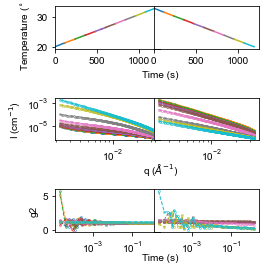

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)

def plot_one_column(ax, avg_data_list, omit_label=False, g2_idx=0):
    for avg_dict in avg_data_list:
        ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'])
        
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
        
        # x = np.
        ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
    
    if not omit_label:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s)')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Time (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_110)
plot_one_column(ax[:, 1], avg_111, omit_label=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('figure3.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()

In [14]:
print(t_el)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.003
 0.003 0.004 0.004 0.005 0.006 0.008 0.009 0.01  0.013 0.015 0.018 0.02
 0.026 0.031 0.036 0.041 0.051 0.061 0.072 0.082 0.102 0.123 0.143 0.164
 0.205 0.246 0.287 0.328 0.41  0.492 0.573 0.655 0.819 0.983 1.147 1.311
 1.638]
